In [15]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

In [16]:
from helpers import *

# Dataprep

`Utbildning.csv` innehåller exakt samma data som `Utbildningsstatistik 2010-2017.xlsx` blad `Årskurs 3, SV`. Det jag har gjort är att plocka ut endast de rader och kolumner som innehåller data, och satt året i varje kolummn för att Pandas ska tolka det som ett multiindex.

In [17]:
df = pd.read_csv(
    '../indata/excel_20190311/Utbildning.csv',
    header=[0,1]
)

In [18]:
df.head()

Basområde                              2017                        \
        Kod                 Namn antal pojkar antal godkända pojkar   
0   1210421        Värtaverket 1          8.0                   5.0   
1   5711120       Salems centrum          NaN                   NaN   
2   3335310           Östra Lund          6.0                   3.0   
3   6240530  Ösmo östra glesbygd          3.0                   0.0   
4   4122420         Norra Smedby         11.0                  11.0   

                                               2016                        \
  antal flickor antal godkända flickor antal pojkar antal godkända pojkar   
0           8.0                    5.0          0.0                   0.0   
1           NaN                    NaN          NaN                   NaN   
2           7.0                    4.0          5.0                   5.0   
3           0.0                    0.0          NaN                   NaN   
4          13.0                   10.0         27.0                  12.0   

                                                ...                    2012  \
  antal flickor antal godkända flickor          ...           antal flickor   
0           4.0                    4.0          ...                     NaN   
1           NaN                    NaN          ...                     NaN   
2           6.0                    6.0          ...                    10.0   
3           NaN                    NaN          ...                     0.0   
4          13.0                    7.0          ...                    16.0   

                                 2011                                      \
  antal godkända flickor antal pojkar antal godkända pojkar antal flickor   
0                    NaN          NaN                   NaN           NaN   
1                    NaN          NaN                   NaN           NaN   
2                   10.0         10.0                   7.0          12.0   
3                    0.0          0.0                   0.0           3.0   
4                    6.0         16.0                   5.0          22.0   

                                 2010                                      \
  antal godkända flickor antal pojkar antal godkända pojkar antal flickor   
0                    NaN          NaN                   NaN           NaN   
1                    NaN          NaN                   NaN           NaN   
2                   12.0          7.0                   4.0          13.0   
3                    3.0          NaN                   NaN           NaN   
4                    9.0         11.0                   7.0           7.0   

                          
  antal godkända flickor  
0                    NaN  
1                    NaN  
2                   10.0  
3                    NaN  
4                    7.0  

[5 rows x 34 columns]

Platta till multiindex

In [19]:
df.columns = [' '.join(col).strip() for col in df.columns.values]

In [20]:
df.head()

,Basområde Kod,Basområde Namn,2017 antal pojkar,2017 antal godkända pojkar,2017 antal flickor,2017 antal godkända flickor,2016 antal pojkar,2016 antal godkända pojkar,2016 antal flickor,2016 antal godkända flickor,...,2012 antal flickor,2012 antal godkända flickor,2011 antal pojkar,2011 antal godkända pojkar,2011 antal flickor,2011 antal godkända flickor,2010 antal pojkar,2010 antal godkända pojkar,2010 antal flickor,2010 antal godkända flickor
0,1210421,Värtaverket 1,8.0,5.0,8.0,5.0,0.0,0.0,4.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5711120,Salems centrum,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3335310,Östra Lund,6.0,3.0,7.0,4.0,5.0,5.0,6.0,6.0,...,10.0,10.0,10.0,7.0,12.0,12.0,7.0,4.0,13.0,10.0
3,6240530,Ösmo östra glesbygd,3.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,3.0,3.0,NaN,NaN,NaN,NaN
4,4122420,Norra Smedby,11.0,11.0,13.0,10.0,27.0,12.0,13.0,7.0,...,16.0,6.0,16.0,5.0,22.0,9.0,11.0,7.0,7.0,7.0


In [21]:
df = df.set_index(['Basområde Kod', 'Basområde Namn']).stack().reset_index()

In [22]:
df.head()

,Basområde Kod,Basområde Namn,level_2,0
0,1210421,Värtaverket 1,2017 antal pojkar,8.0
1,1210421,Värtaverket 1,2017 antal godkända pojkar,5.0
2,1210421,Värtaverket 1,2017 antal flickor,8.0
3,1210421,Värtaverket 1,2017 antal godkända flickor,5.0
4,1210421,Värtaverket 1,2016 antal pojkar,0.0


Sätt beskrivande kolumnnamn.

In [23]:
df = df.rename(columns={'Basområde Kod':'BASKOD2010','level_2': 'year_group_gender', 0: 'value'})

Splitta ut `year_group_gender` till separata kolumner.

In [24]:
df['Kön'] = df['year_group_gender'].str.split().str[-1]

df['year'] = df['year_group_gender'].str.split().str[0]

df['grupp'] = df['year_group_gender'].str.split().str[1:-1].str.join(sep=' ')

In [25]:
df.head()

,BASKOD2010,Basområde Namn,year_group_gender,value,Kön,year,grupp
0,1210421,Värtaverket 1,2017 antal pojkar,8.0,pojkar,2017,antal
1,1210421,Värtaverket 1,2017 antal godkända pojkar,5.0,pojkar,2017,antal godkända
2,1210421,Värtaverket 1,2017 antal flickor,8.0,flickor,2017,antal
3,1210421,Värtaverket 1,2017 antal godkända flickor,5.0,flickor,2017,antal godkända
4,1210421,Värtaverket 1,2016 antal pojkar,0.0,pojkar,2016,antal


Pivotera

In [26]:
df = df.pivot_table(index=['BASKOD2010', 'year', 'Kön'], columns='grupp', values='value').reset_index()

In [27]:
df.sample(5)

grupp,BASKOD2010,year,Kön,antal,antal godkända
2860,2120100,2016,flickor,32.0,29.0
11707,4450150,2012,pojkar,15.0,9.0
17356,6220100,2011,flickor,11.0,8.0
6810,3411200,2012,flickor,9.0,9.0
16170,5712210,2016,flickor,8.0,8.0


In [30]:
df = baskod2010tobasomrade(df, n_numeric=2)

KeyError: 'BASKOD2010'

Behåll bara relevanta kolumner.

In [31]:
df = df[['basomrade', 'year', 'Kön', 'antal', 'antal godkända']]

In [32]:
df.head()

,basomrade,year,Kön,antal,antal godkända
0,1010130_munkbron,2010,flickor,0.0,0.0
1,1010140_stortorget,2010,flickor,4.0,4.0
2,1010230_centralposten,2010,flickor,4.0,4.0
3,1010240_oscarsteatern,2010,flickor,0.0,0.0
4,1010290_oxtorget,2010,flickor,0.0,0.0


# Beräkningar

In [33]:
concept = 'education_year_3_sv'

## Andel per kön

In [34]:
bygender = df.copy()

bygender['andel'] = bygender['antal godkända'] / bygender['antal']

In [35]:
bygender['Kön'] = bygender['Kön'].astype('category')
bygender['Kön'].cat.categories = ['female', 'male']

In [36]:
bygender = bygender[['basomrade', 'year', 'Kön', 'andel']]

bygender = bygender.rename(columns={'andel': 'value'})

In [37]:
female, male = byGender(concept, bygender, new=True)

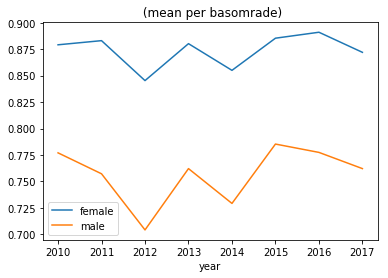

In [39]:
plotcombined(female, 'female', concept)
plotcombined(male, 'male')

## Andel totalt

In [40]:
total = df.copy()

total = df.groupby(['basomrade', 'year']).sum().reset_index()

In [41]:
total['andel'] = total['antal godkända'] / total['antal']

total = total.rename(columns={'andel': 'value'})

In [42]:
combined = appendNewDatapoints(concept, total, new=True)

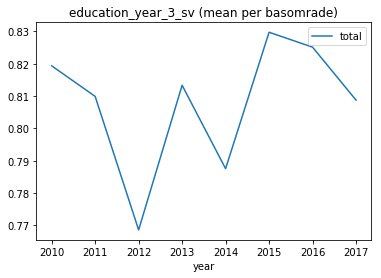

In [43]:
plotcombined(combined, 'total', concept)